In [1]:
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.metrics import mean_squared_error
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
lifeexp = pd.read_csv("Life-Expectancy-Data.csv")

In [3]:
lifeexp.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
lifeexp.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


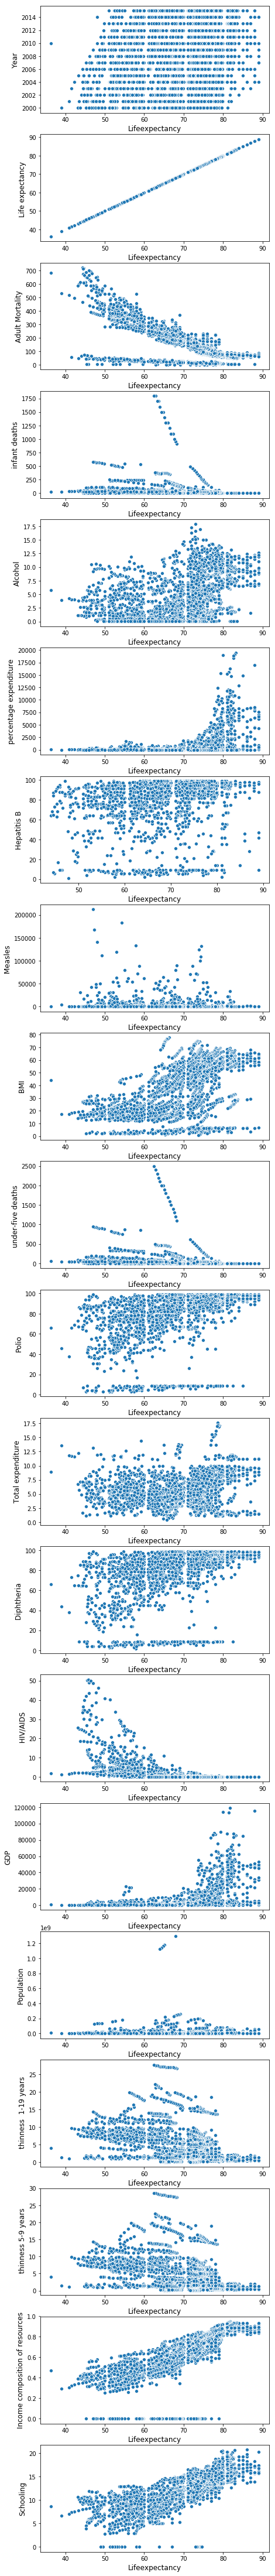

In [9]:
cols = list(lifeexp.columns.values)
cols.remove("Country")
cols.remove("Status")
fig, ax = plt.subplots(nrows = len(cols), ncols = 1, figsize = (7, 80))
for i in range(len(cols)):
    sns.scatterplot(ax=ax[i],
                 data=lifeexp, 
                 x="Life expectancy ", 
                 y=cols[i])
    
    ax[i].set_xlabel("Lifeexpectancy", fontsize = 12)
    ax[i].set_ylabel(cols[i], fontsize = 12)


plt.show()

In [48]:
len(cols)

20

In [49]:
lifeexp.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [50]:
lifedf = lifeexp.drop(labels=["Country", "Year", "Status", "Polio", "infant deaths", "Hepatitis B", "Measles ", "Total expenditure","under-five deaths ", "Diphtheria ", "Population", " thinness  1-19 years", " thinness 5-9 years"], axis=1)

In [51]:
lifedf.head()

,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,BMI,HIV/AIDS,GDP,Income composition of resources,Schooling
0,65.0,263.0,0.01,71.279624,19.1,0.1,584.259210,0.479,10.1
1,59.9,271.0,0.01,73.523582,18.6,0.1,612.696514,0.476,10.0
2,59.9,268.0,0.01,73.219243,18.1,0.1,631.744976,0.470,9.9
3,59.5,272.0,0.01,78.184215,17.6,0.1,669.959000,0.463,9.8
4,59.2,275.0,0.01,7.097109,17.2,0.1,63.537231,0.454,9.5


In [52]:
lifedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 9 columns):
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
 BMI                               2904 non-null float64
 HIV/AIDS                          2938 non-null float64
GDP                                2490 non-null float64
Income composition of resources    2771 non-null float64
Schooling                          2775 non-null float64
dtypes: float64(9)
memory usage: 206.7 KB


In [53]:
# find all the null values in df
lifedf.isnull().sum()

Life expectancy                     10
Adult Mortality                     10
Alcohol                            194
percentage expenditure               0
 BMI                                34
 HIV/AIDS                            0
GDP                                448
Income composition of resources    167
Schooling                          163
dtype: int64

In [54]:
lifedf.Alcohol.value_counts() 

0.01     288
0.03      15
0.04      13
0.09      12
0.02      12
0.21      10
0.06      10
1.18      10
0.54       9
0.56       9
0.55       9
0.08       9
0.49       9
0.05       9
1.29       8
0.53       8
0.50       8
0.17       8
0.28       7
1.16       7
0.10       7
0.20       7
7.38       7
0.46       7
2.86       7
2.55       6
0.85       6
0.45       6
0.32       6
1.23       6
        ... 
8.16       1
10.11      1
11.51      1
7.72       1
12.61      1
13.40      1
11.19      1
11.14      1
5.46       1
11.54      1
9.80       1
2.81       1
10.06      1
2.21       1
12.14      1
13.44      1
1.05       1
13.49      1
1.88       1
9.08       1
7.76       1
2.43       1
11.58      1
10.31      1
5.18       1
8.98       1
5.86       1
9.03       1
6.87       1
13.28      1
Name: Alcohol, Length: 1076, dtype: int64

In [55]:
#replace alcohol null values with the most recurrent number
lifedf.Alcohol.fillna(0.01,inplace=True)

In [56]:
#replace GDP null values with the median
b=lifedf.GDP.median()
lifedf.GDP.fillna(b,inplace=True)

In [57]:
lifedf.isnull().sum()

Life expectancy                     10
Adult Mortality                     10
Alcohol                              0
percentage expenditure               0
 BMI                                34
 HIV/AIDS                            0
GDP                                  0
Income composition of resources    167
Schooling                          163
dtype: int64

In [58]:
lifedf["Income composition of resources"].value_counts() 

0.000    130
0.700     17
0.739     13
0.636     12
0.714     12
0.860     11
0.703     11
0.723     11
0.734     11
0.877     11
0.686     11
0.797     11
0.735     11
0.737     11
0.873     10
0.755     10
0.754     10
0.706     10
0.712     10
0.709     10
0.720     10
0.725     10
0.745      9
0.761      9
0.792      9
0.625      9
0.692      9
0.687      9
0.788      9
0.673      9
        ... 
0.261      1
0.926      1
0.331      1
0.270      1
0.301      1
0.359      1
0.364      1
0.861      1
0.389      1
0.517      1
0.938      1
0.939      1
0.330      1
0.937      1
0.931      1
0.627      1
0.460      1
0.941      1
0.930      1
0.353      1
0.948      1
0.413      1
0.510      1
0.293      1
0.913      1
0.914      1
0.336      1
0.348      1
0.309      1
0.352      1
Name: Income composition of resources, Length: 625, dtype: int64

In [59]:
c=lifedf.GDP.median()
lifedf["Income composition of resources"].fillna(c,inplace=True)

In [60]:
lifedf.isnull().sum()

Life expectancy                     10
Adult Mortality                     10
Alcohol                              0
percentage expenditure               0
 BMI                                34
 HIV/AIDS                            0
GDP                                  0
Income composition of resources      0
Schooling                          163
dtype: int64

In [61]:
#the rest drop the null values
lifedf.dropna(inplace=True)

In [62]:
#correlation scores
lifedf.corr()

,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,BMI,HIV/AIDS,GDP,Income composition of resources,Schooling
Life expectancy,1.000000,-0.681017,0.340818,0.395173,0.563736,-0.567232,0.446744,0.719335,0.749688
Adult Mortality,-0.681017,1.000000,-0.154287,-0.246023,-0.375359,0.532450,-0.286479,-0.447458,-0.442386
Alcohol,0.340818,-0.154287,1.000000,0.376205,0.287738,-0.023784,0.324219,0.403869,0.495127
percentage expenditure,0.395173,-0.246023,0.376205,1.000000,0.234671,-0.100292,0.900884,0.383634,0.396947
BMI,0.563736,-0.375359,0.287738,0.234671,1.000000,-0.241796,0.283933,0.509299,0.558363
HIV/AIDS,-0.567232,0.532450,-0.023784,-0.100292,-0.241796,1.000000,-0.125551,-0.251248,-0.227295
GDP,0.446744,-0.286479,0.324219,0.900884,0.283933,-0.125551,1.000000,0.446120,0.444125
Income composition of resources,0.719335,-0.447458,0.403869,0.383634,0.509299,-0.251248,0.446120,1.000000,0.791651
Schooling,0.749688,-0.442386,0.495127,0.396947,0.558363,-0.227295,0.444125,0.791651,1.000000


In [63]:
corr = lifedf.corr()
corr

,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,BMI,HIV/AIDS,GDP,Income composition of resources,Schooling
Life expectancy,1.000000,-0.681017,0.340818,0.395173,0.563736,-0.567232,0.446744,0.719335,0.749688
Adult Mortality,-0.681017,1.000000,-0.154287,-0.246023,-0.375359,0.532450,-0.286479,-0.447458,-0.442386
Alcohol,0.340818,-0.154287,1.000000,0.376205,0.287738,-0.023784,0.324219,0.403869,0.495127
percentage expenditure,0.395173,-0.246023,0.376205,1.000000,0.234671,-0.100292,0.900884,0.383634,0.396947
BMI,0.563736,-0.375359,0.287738,0.234671,1.000000,-0.241796,0.283933,0.509299,0.558363
HIV/AIDS,-0.567232,0.532450,-0.023784,-0.100292,-0.241796,1.000000,-0.125551,-0.251248,-0.227295
GDP,0.446744,-0.286479,0.324219,0.900884,0.283933,-0.125551,1.000000,0.446120,0.444125
Income composition of resources,0.719335,-0.447458,0.403869,0.383634,0.509299,-0.251248,0.446120,1.000000,0.791651
Schooling,0.749688,-0.442386,0.495127,0.396947,0.558363,-0.227295,0.444125,0.791651,1.000000


In [64]:
lifedf.describe()

,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,BMI,HIV/AIDS,GDP,Income composition of resources,Schooling
count,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000
mean,69.484064,161.517909,4.261853,791.654020,38.509430,1.758297,6975.734654,0.631408,12.093750
std,9.318313,122.482704,4.035865,2049.822962,19.857229,5.214623,13708.226300,0.207719,3.234544
min,36.300000,1.000000,0.010000,0.000000,1.000000,0.100000,1.681350,0.000000,0.000000
25%,63.800000,73.000000,0.490000,10.262802,19.375000,0.100000,538.952311,0.499000,10.200000
50%,72.300000,142.000000,3.110000,80.371468,44.000000,0.100000,1766.947595,0.679000,12.400000
75%,75.600000,222.000000,7.282500,493.349782,56.100000,0.700000,5339.909686,0.780250,14.300000
max,89.000000,723.000000,17.870000,19479.911610,77.600000,50.600000,119172.741800,0.948000,20.700000


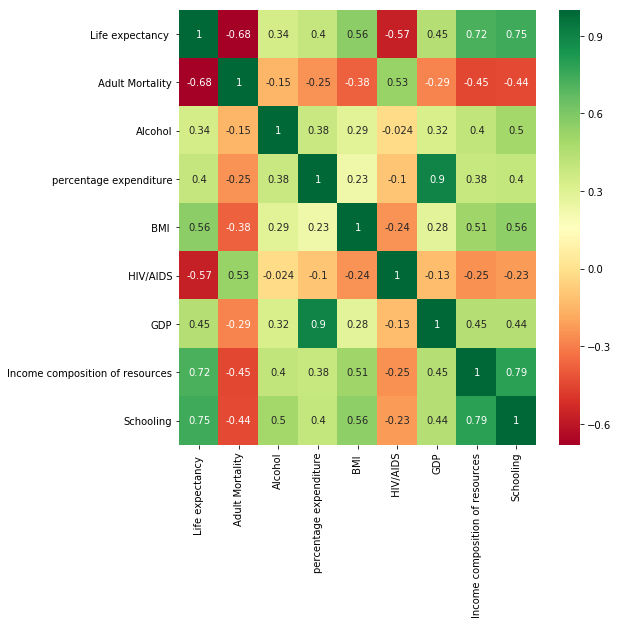

In [65]:
plt.subplots(figsize=(8,8))
sns.heatmap(corr,cmap= 'RdYlGn',annot=True)
plt.show()

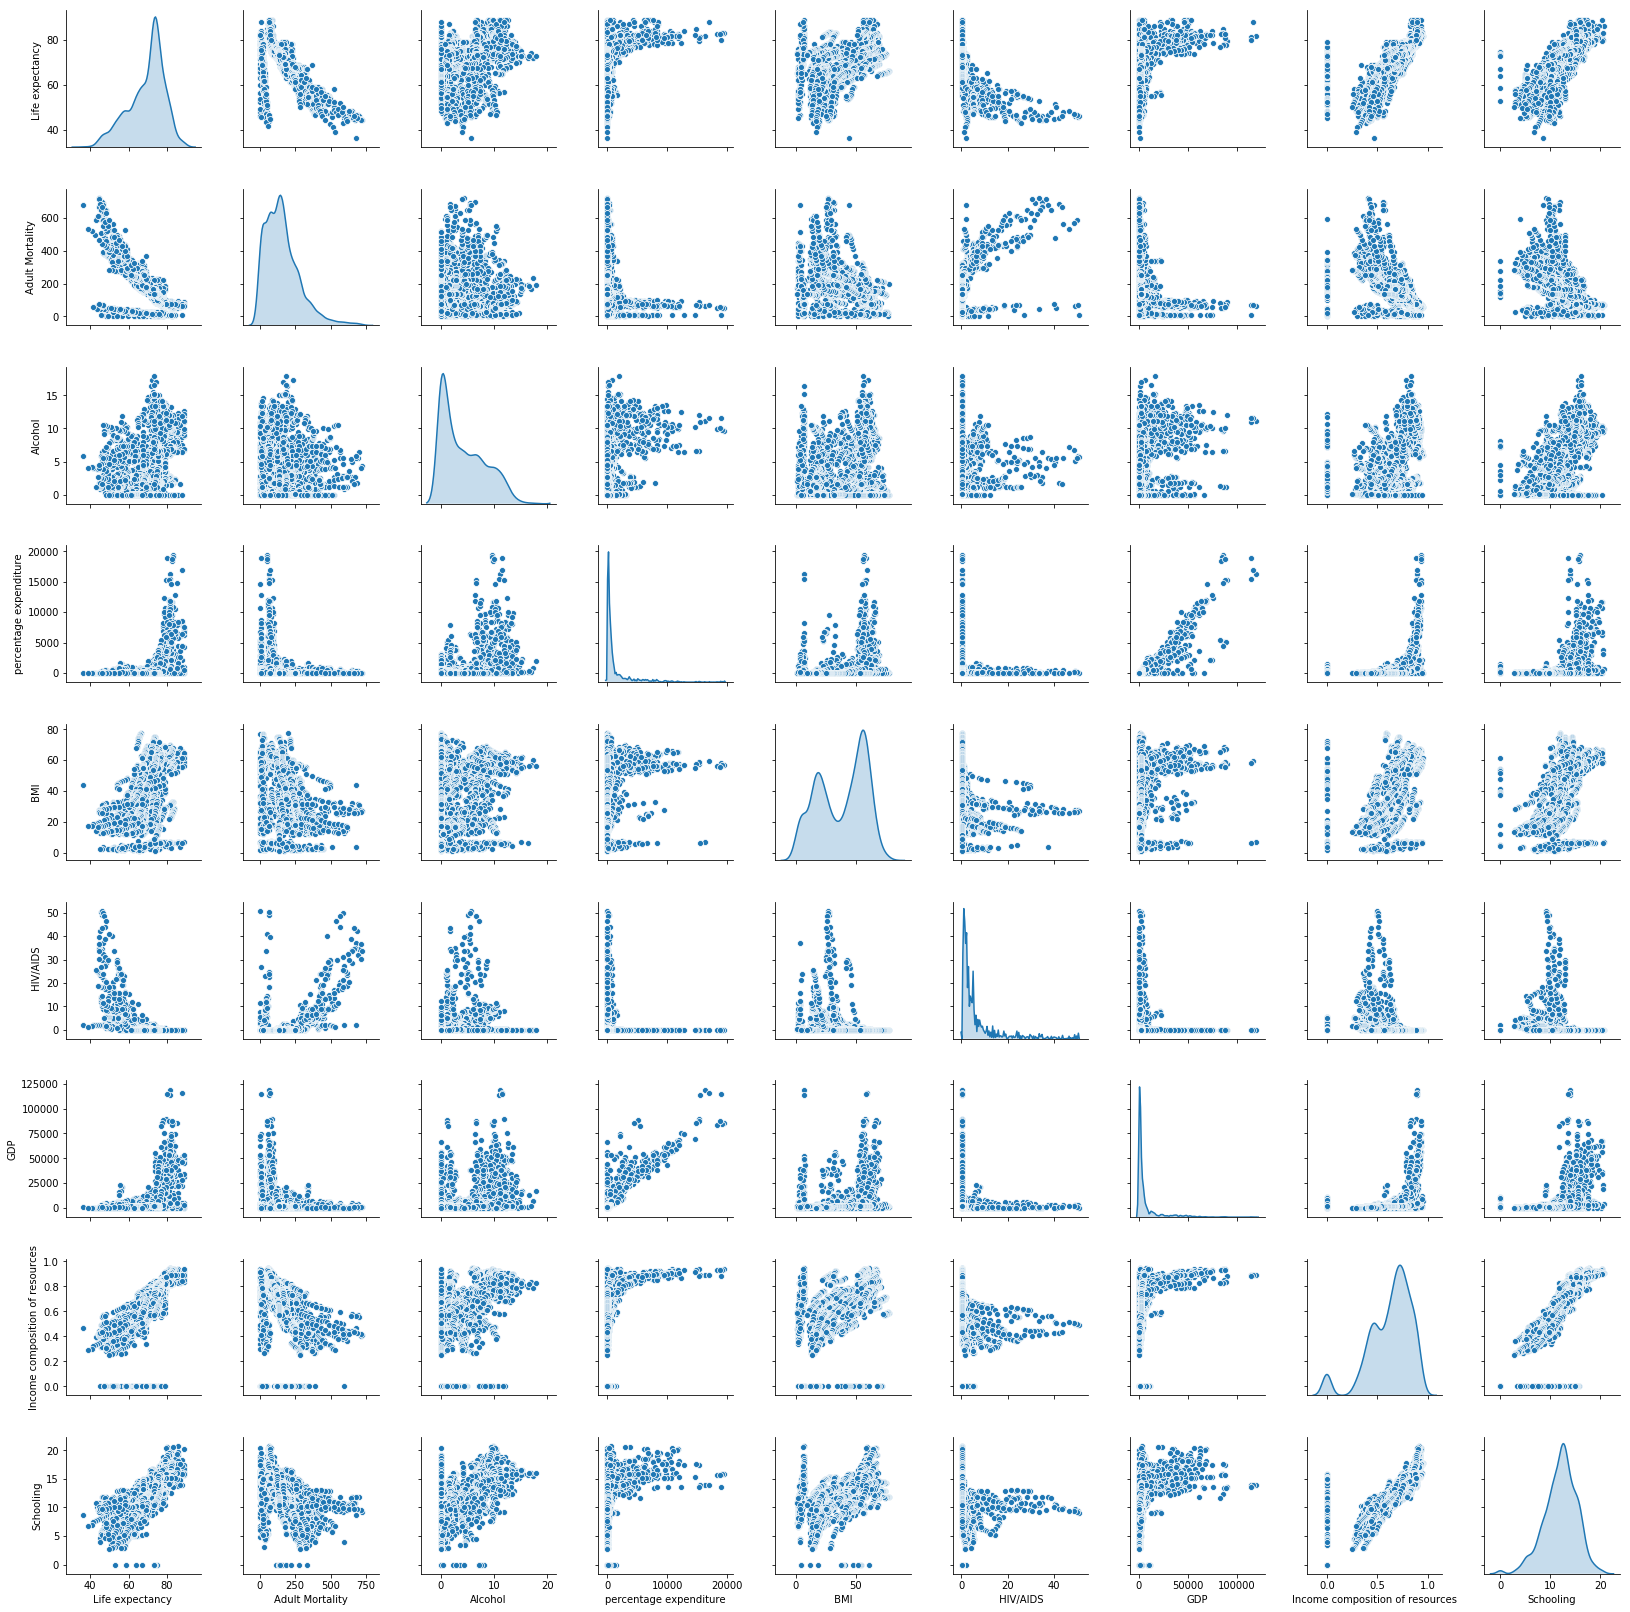

In [66]:
sns.pairplot(lifedf, diag_kind ="kde")

In [73]:
yy = lifedf['Life expectancy ']
xx = lifedf.drop(labels='Life expectancy ', axis=1)

In [74]:
train_x, test_x, train_y, test_y = train_test_split(xx,yy,test_size=0.2,random_state=999)

In [75]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(2188, 8)
(2188,)
(548, 8)
(548,)


In [76]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
print(lm)
print(type(lm))

LinearRegression()
<class 'sklearn.linear_model._base.LinearRegression'>


In [77]:
reg=lm.fit(train_x, train_y)

In [78]:
predicted_y = lm.predict(test_x)

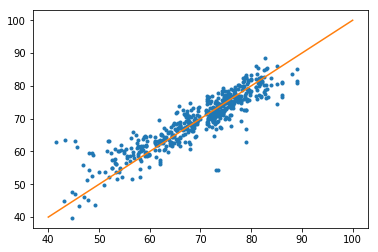

In [79]:
plt.plot(test_y, predicted_y, '.')

# plot a line, a perfit predict would all fall on this line
xxx = np.linspace(40, 100, 100)
yyy = xxx
plt.plot(xxx, yyy)
plt.show()

In [37]:
from sklearn import metrics as mt
print("1) The model explains,", np.round(mt.explained_variance_score(test_y,predicted_y)*100,2),"% variance of the target w.r.t features is")
print("2) The Mean Absolute Error of model is:", np.round(mt.mean_absolute_error(test_y,predicted_y ),2))
print("3) The R-Square score of the model is " , np.round(mt.r2_score(test_y,predicted_y),2))

1) The model explains, 76.29 % variance of the target w.r.t features is
2) The Mean Absolute Error of model is: 3.04
3) The R-Square score of the model is  0.76


In [38]:
coeff = pd.Series(lm.coef_, index = train_x.columns)
intercept = lm.intercept_
print("Coefficients:\n")
print(coeff)
print("\n")
print("Intercept:\n")
print(intercept)
print("\n")

Coefficients:

Adult Mortality                   -0.030746
Alcohol                           -0.001368
percentage expenditure             0.000079
GDP                                0.000044
Income composition of resources    9.902113
Schooling                          0.965854
dtype: float64


Intercept:

56.24272932442107




In [39]:
print('\nCoefficient of model :', lm.coef_)

# intercept of the model
print('\nIntercept of model',lm.intercept_)


Coefficient of model : [-3.07462543e-02 -1.36825026e-03  7.90512824e-05  4.35473223e-05
  9.90211283e+00  9.65853900e-01]

Intercept of model 56.24272932442107


In [40]:
predict_train = lm.predict(train_x)
print(predict_train)

[82.32723997 62.22207154 56.55757001 ... 77.76653026 52.14459159
 76.65561297]


In [41]:
rmse_train = mean_squared_error(train_y,predict_train)**(0.5)
print('\nRMSE on train dataset : ', rmse_train)

# predict the target on the testing dataset
predict_test = lm.predict(test_x)
print(predict_test)

# Root Mean Squared Error on testing dataset
rmse_test = mean_squared_error(test_y,predict_test)**(0.5)
print('\nRMSE on test dataset : ', rmse_test)


RMSE on train dataset :  4.851383982325301
[75.0901557  74.55175395 67.76249943 64.76554016 60.00179474 78.34643524
 73.96317161 75.57750845 73.21478305 60.91747137 75.15611772 60.35711249
 51.41879429 67.6134446  61.14949734 45.27284168 79.69856035 66.17340157
 62.64783325 62.38873564 74.57059335 61.06185157 58.56045857 68.44385781
 77.7811325  59.89890308 65.50057115 82.53242778 70.50037942 72.90474224
 67.9996599  75.00366506 74.94725257 65.56046256 72.47034414 66.6857411
 69.28696648 69.76556184 68.00322199 74.07514714 74.64378389 72.6488793
 60.5652611  67.43327755 75.3915236  70.23585755 72.49121301 73.94310084
 63.70925829 75.98289527 79.52289227 69.28062676 73.87575103 66.90926712
 79.1428673  68.06269941 76.65419033 78.19657047 71.84491077 59.11054423
 59.72299065 73.85995421 66.6121499  75.69061882 69.13147143 79.58597712
 71.28788459 66.32815112 76.1574132  76.5467017  68.57444496 84.15417495
 70.41036025 66.4602115  74.98252077 64.57938669 66.24857551 61.78355049
 82.12329

In [42]:
from sklearn.metrics import r2_score 
r2_score(test_y,predicted_y)

0.7624113625317915

In [43]:
res = test_y - predicted_y

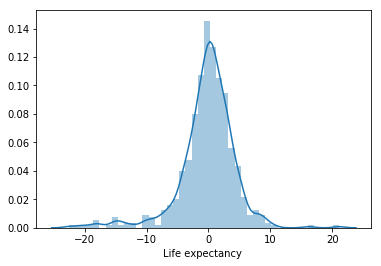

In [44]:
sns.distplot(res)

In [45]:
z=pd.DataFrame({'actual':test_y,'predicted':predicted_y})

In [46]:
z.head(100)

,actual,predicted
2247,72.8,75.090156
189,74.9,74.551754
1132,65.0,67.762499
2364,68.7,64.765540
2492,56.5,60.001795
1315,83.5,78.346435
1603,78.2,73.963172
774,73.1,75.577508
1450,78.0,73.214783
1369,57.9,60.917471


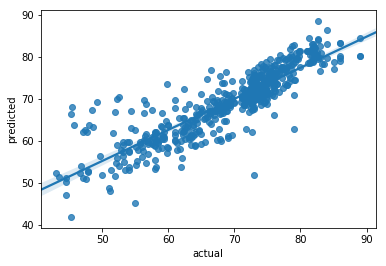

In [47]:
sns.regplot('actual','predicted',data=z)